In [107]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
movie_gross=pd.read_csv('/content/bom.movie_gross.csv')
movie_gross.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


In [8]:
basics=pd.read_csv('/content/title.basics.csv')
basics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [9]:
ratings=pd.read_csv("/content/title.ratings.csv")
ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [10]:
#checking shape for df1 dataset
movie_gross.shape

(3387, 5)

In [11]:
#checking shape for df2 dataset
basics.shape

(146144, 6)

In [12]:
#checking shape for df3 dataset
ratings.shape

(73856, 3)

In [17]:
df0=ratings.merge(basics, on = 'tconst', how = 'inner')
df0.head(2)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary


In [19]:
df0.shape

(73856, 8)

In [21]:
#concatenating the df0 on df
df = pd.concat([movie_gross,df0])
df.head(2)

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#checking for missing values
df.isna().sum()

title              73856
studio             73861
domestic_gross     73884
foreign_gross      75206
year               73856
tconst              3387
averagerating       3387
numvotes            3387
primary_title       3387
original_title      3387
start_year          3387
runtime_minutes    11007
genres              4191
dtype: int64

Dropping and filling missing values

In [24]:
df.domestic_gross.fillna(df.domestic_gross.mean(),inplace=True)

In [25]:
df.foreign_gross.fillna(df.foreign_gross.mean(),inplace=True)

In [27]:
df.averagerating.fillna(df.averagerating.mean(),inplace=True)

In [28]:
df.numvotes.fillna(df.numvotes.mean(),inplace=True)

In [29]:
df.runtime_minutes.fillna(df.runtime_minutes.mean(),inplace=True)

Filling missing values as unknowns

In [31]:
df['genres'].fillna('Unknown_genres', inplace=True)

In [46]:
df['studio'].dropna(inplace=True)

In [65]:
df['year'].dropna(inplace=True)

In [66]:
df['start_year'].dropna(inplace=True)

In [45]:
df.drop(['original_title'], axis=1).head(3)

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010.0,NaN,6.332729,3523.662167,NaN,mode_value,94.65404,Unknown_genres
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,NaN,6.332729,3523.662167,NaN,mode_value,94.65404,Unknown_genres
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010.0,NaN,6.332729,3523.662167,NaN,mode_value,94.65404,Unknown_genres


In [42]:
mode_value1=df['year'].mode()[0]
mode_value1

'mode_value1'

In [37]:
df['year'].fillna(mode_value1, inplace=True)

In [38]:
mode_value=df['start_year'].mode()[0]
mode_value

2016.0

In [39]:
df['start_year'].fillna(mode_value, inplace=True)

Changing start_year and year to datetime dataset

In [ ]:
#changing start_year and year columns to datetime
df['year'] = pd.to_datetime(df['year'])
df['start_year'] = pd.to_datetime(df['start_year'])
df.info()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77243 entries, 0 to 73855
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3387 non-null   object 
 1   studio           3382 non-null   object 
 2   domestic_gross   77243 non-null  float64
 3   foreign_gross    77243 non-null  float64
 4   year             77243 non-null  object 
 5   tconst           73856 non-null  object 
 6   averagerating    77243 non-null  float64
 7   numvotes         77243 non-null  float64
 8   primary_title    73856 non-null  object 
 9   original_title   73856 non-null  object 
 10  start_year       77243 non-null  object 
 11  runtime_minutes  77243 non-null  float64
 12  genres           77243 non-null  object 
dtypes: float64(5), object(8)
memory usage: 8.3+ MB


In [41]:
df.head(3)


,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,mode_value,94.65404,Unknown_genres
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,mode_value,94.65404,Unknown_genres
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,mode_value,94.65404,Unknown_genres


In [69]:
df.isna().sum()

title              73856
studio             73861
domestic_gross         0
foreign_gross          0
year                   0
tconst              3387
averagerating          0
numvotes               0
primary_title       3387
original_title      3387
start_year             0
runtime_minutes        0
genres                 0
dtype: int64

EXPLORATORY DATA ANALYSIS


Checking for outliers




<Axes: title={'center': 'Boxplot to detect outliers for averagerating'}, xlabel='averagerating'>

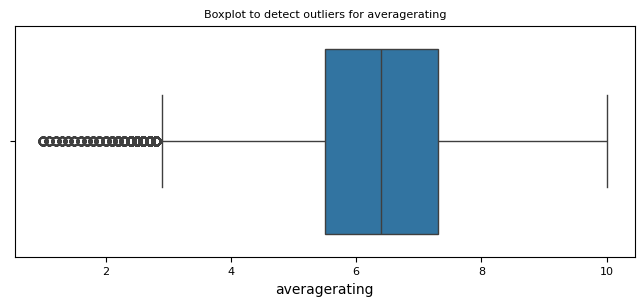

In [74]:
#a boxplot to visualize distribution of any outliers in avearagerating
plt.figure(figsize=(8,3))
plt.title('Boxplot to detect outliers for averagerating', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df['averagerating'])

<Axes: title={'center': 'Boxplot to detect outliers for numvotes'}, xlabel='numvotes'>

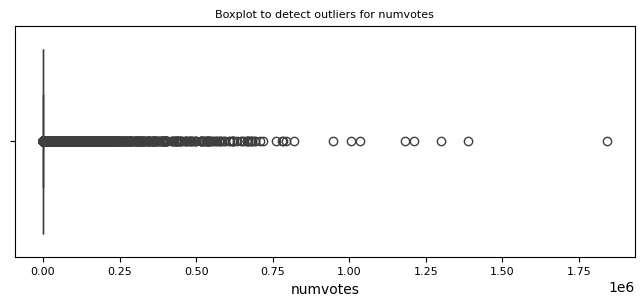

In [77]:
#a boxplot to visualize distribution of any outliers in numvotes
plt.figure(figsize=(8,3))
plt.title('Boxplot to detect outliers for numvotes', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df['numvotes'])

In [95]:
df.describe()['numvotes']

count    7.724300e+04
mean     3.523662e+03
std      2.962239e+04
min      5.000000e+00
25%      1.500000e+01
50%      5.600000e+01
75%      3.810000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

<Axes: title={'center': 'Boxplot to detect outliers for domestics gross'}, xlabel='domestic_gross'>

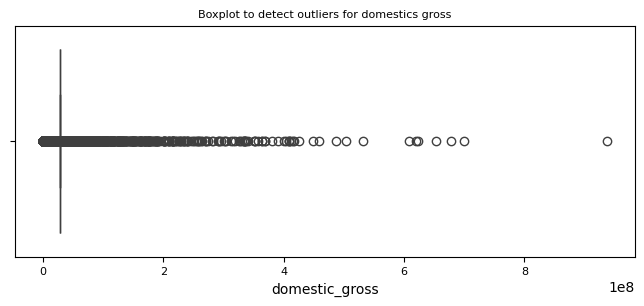

In [82]:
#a boxplot to visualize distribution of any outliers in numvotes
plt.figure(figsize=(8,3))
plt.title('Boxplot to detect outliers for domestics gross', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df['domestic_gross'])

In [94]:
df.describe()['domestic_gross']

count    7.724300e+04
mean     2.874585e+07
std      1.396609e+07
min      1.000000e+02
25%      2.874585e+07
50%      2.874585e+07
75%      2.874585e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

<Axes: title={'center': 'Boxplot to detect outliers for runtime_minutes'}, xlabel='runtime_minutes'>

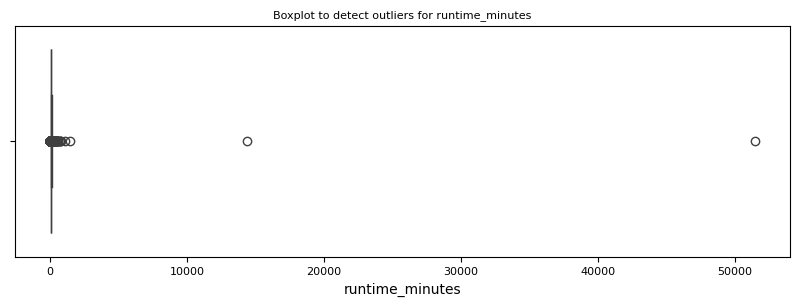

In [88]:
#a boxplot to visualize distribution of any outliers in numvotes
plt.figure(figsize=(10,3))
plt.title('Boxplot to detect outliers for runtime_minutes', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df['runtime_minutes'])

In [93]:
df.describe()['runtime_minutes']

count    77243.000000
mean        94.654040
std        193.142308
min          3.000000
25%         83.000000
50%         94.654040
75%        100.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [80]:
df.head(2)

,title,studio,domestic_gross,foreign_gross,year,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,mode_value,94.65404,Unknown_genres
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010.0,NaN,6.332729,3523.662167,NaN,NaN,mode_value,94.65404,Unknown_genres


In [89]:
top_10_genres = pd.DataFrame(df['genres'].value_counts().head(10))
top_10_genres

,genres
Drama,11612
Documentary,10313
Comedy,5613
Unknown_genres,4191
Horror,2692
"Comedy,Drama",2617
Thriller,1555
"Drama,Romance",1510
"Comedy,Romance",1236
"Comedy,Drama,Romance",1208


<Figure size 100x100 with 0 Axes>

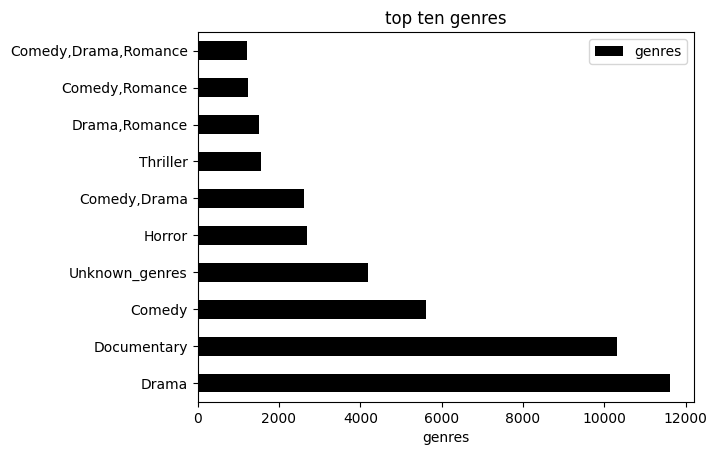

In [97]:
#histogram to show distribution of bmi
plt.figure(figsize=(1,1))
top_10_genres.plot(kind='barh', color='black')
plt.title('top ten genres')
plt.xlabel("genres")
plt.show()

In [ ]:
top_10_studios=pd.DataFrame(df['studio'].value_counts().head(10))
top_10_studios

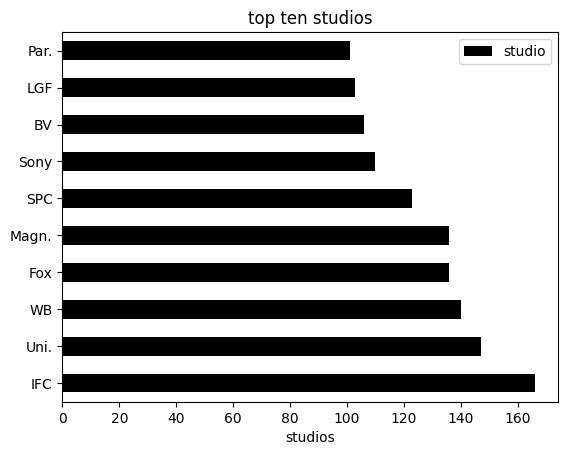

In [96]:
#bar chart to represent  to ten studios in the industry
top_10_studios.plot(kind='barh', color='black')
plt.title('top ten studios')
plt.xlabel("studios")
plt.show()

In [59]:
budgets=pd.read_csv('/content/tn.movie_budgets.csv')
budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875


In [63]:
budgets['profits']=budgets['worldwide_gross']-budgets['production_budget']
budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profits
0,1,18-Dec-09,Avatar,425000000,760507625,2776345279,2351345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875


In [106]:
#df0.rename(columns = {'primary_title':'title'}, inplace = True)
#df0.head(2)

In [102]:
df5=pd.merge(df0,movie_gross, on ='title')

In [105]:
df5

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0,2013
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Shout!,NaN,3400000.0,2014
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,2011
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
3021,tt3399916,6.3,4185,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",Magn.,5200.0,NaN,2015
3022,tt3616916,6.7,28167,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",Magn.,177000.0,NaN,2016
3023,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Cohen,260000.0,NaN,2015
3024,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Focus,6800000.0,5000000.0,2018


In [110]:
budgets.rename(columns = {'movie':'title'}, inplace = True)

In [112]:
df6=pd.merge(df0,budgets, on='title')

In [121]:
df6.head(2)

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profits
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,10-Jan-14,70000000,18848538,58953319,-11046681
1,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",50,21-Mar-08,850000,442638,442638,-407362


In [149]:
profits_by_genre = pd.DataFrame(df6.groupby('genres')['profits'].sum())
J=profits_by_genre.sort_values( by ='profits',ascending=False).head(10)
J

,profits
genres,
"Action,Adventure,Sci-Fi",25434152015
"Adventure,Animation,Comedy",20347160147
"Action,Adventure,Fantasy",8711757789
Drama,7678410452
"Action,Adventure,Comedy",7068300318
"Action,Adventure,Animation",5478379310
Horror,5010270640
"Adventure,Family,Fantasy",3838998673
Documentary,3815704039


<Axes: ylabel='genres'>

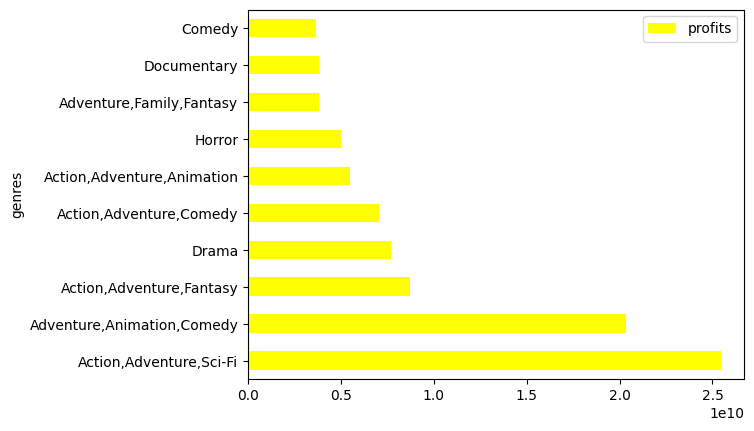

In [151]:
J.plot(kind='barh', color='yellow')

In [ ]:
profits_by_genre

In [130]:
df6['profits']

0      -11046681
1        -407362
2        -407362
3       14385836
4       61300835
          ...   
2870    -2693352
2871    81040000
2872    -9758281
2873    -1401194
2874      255538
Name: profits, Length: 2875, dtype: int64

In [ ]:
top_10_studios=pd.DataFrame(df['studio'].value_counts().head(10))
top_10_studios

In [153]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             2875 non-null   object 
 1   averagerating      2875 non-null   float64
 2   numvotes           2875 non-null   int64  
 3   title              2875 non-null   object 
 4   original_title     2875 non-null   object 
 5   start_year         2875 non-null   int64  
 6   runtime_minutes    2757 non-null   float64
 7   genres             2867 non-null   object 
 8   id                 2875 non-null   int64  
 9   release_date       2875 non-null   object 
 10  production_budget  2875 non-null   int64  
 11  domestic_gross     2875 non-null   int64  
 12  worldwide_gross    2875 non-null   int64  
 13  profits            2875 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 401.5+ KB


Text(0.5, 1.0, 'Total Domestic Gross')

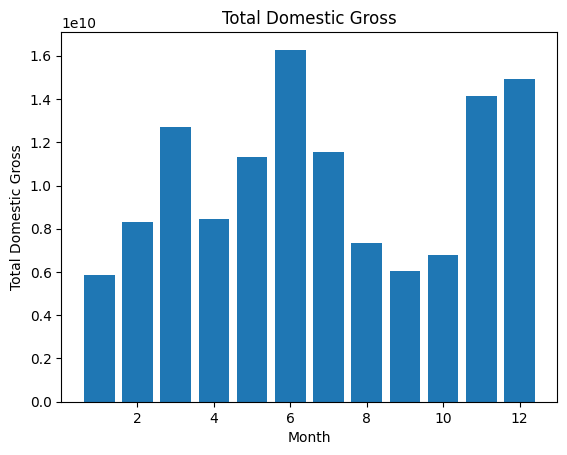

In [155]:
# Convert release date to datetime format
df6['release_date'] = pd.to_datetime(df6['release_date'])

# Extract month from release date
df6['Release Month'] = df6['release_date'].dt.month

# Group by month and calculate total domestic gross
monthly_domestic_gross = df6.groupby('Release Month')['domestic_gross'].sum()

# Plot bar chart
plt.bar(monthly_domestic_gross.index, monthly_domestic_gross.values)

# Customize plot
plt.xlabel('Month')
plt.ylabel('Total Domestic Gross')
plt.title('Total Domestic Gross')

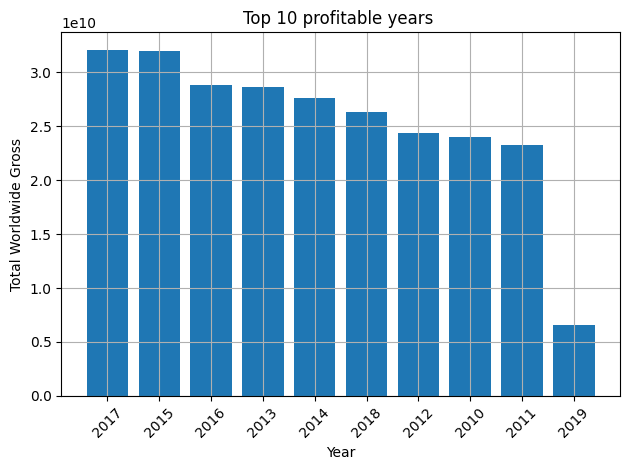

In [169]:
# Convert release date to datetime format and extract release year
df6['Release Year'] = pd.to_datetime(df6['release_date']).dt.year

# Group by year and calculate total worldwide gross
yearly_worldwide_gross = df6.groupby('Release Year')['worldwide_gross'].sum()


# Sort years based on total worldwide gross and select top 10 years
top_10_years = yearly_worldwide_gross.sort_values(ascending=False).head(10)

# Plot bar chart
plt.bar(top_10_years.index.astype(str), top_10_years.values)

# Customize plot
plt.xlabel('Year')
plt.ylabel('Total Worldwide Gross')
plt.title('Top 10 profitable years ')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [168]:
df6.head(2)

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profits,Release Month,Release Year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,2014-01-10,70000000,18848538,58953319,-11046681,1,2014
1,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",50,2008-03-21,850000,442638,442638,-407362,3,2008


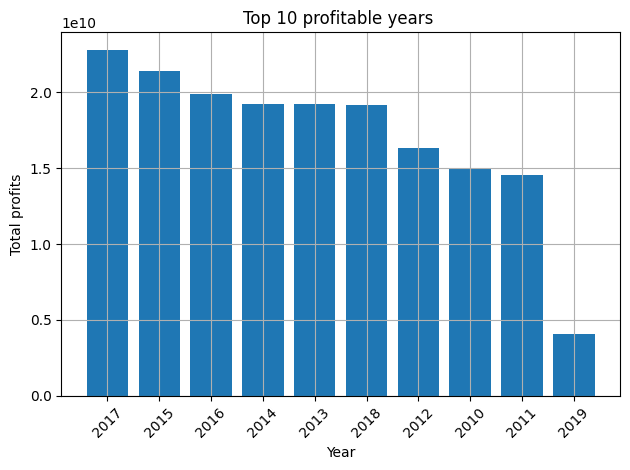

In [170]:
# Convert release date to datetime format and extract release year
df6['Release Year'] = pd.to_datetime(df6['release_date']).dt.year

# Group by year and calculate total worldwide gross
yearly_worldwide_gross = df6.groupby('Release Year')['profits'].sum()
#yearly_worldwide_gross.sort_values(yearly_worldwide_gross, ascending=False)


# Sort years based on total worldwide gross and select top 10 years
top_10_years = yearly_worldwide_gross.sort_values(ascending=False).head(10)

# Plot bar chart
plt.bar(top_10_years.index.astype(str), top_10_years.values)

# Customize plot
plt.xlabel('Year')
plt.ylabel('Total profits')
plt.title('Top 10 profitable years ')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

In [171]:
df6.head(2)

,tconst,averagerating,numvotes,title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,profits,Release Month,Release Year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,2014-01-10,70000000,18848538,58953319,-11046681,1,2014
1,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",50,2008-03-21,850000,442638,442638,-407362,3,2008


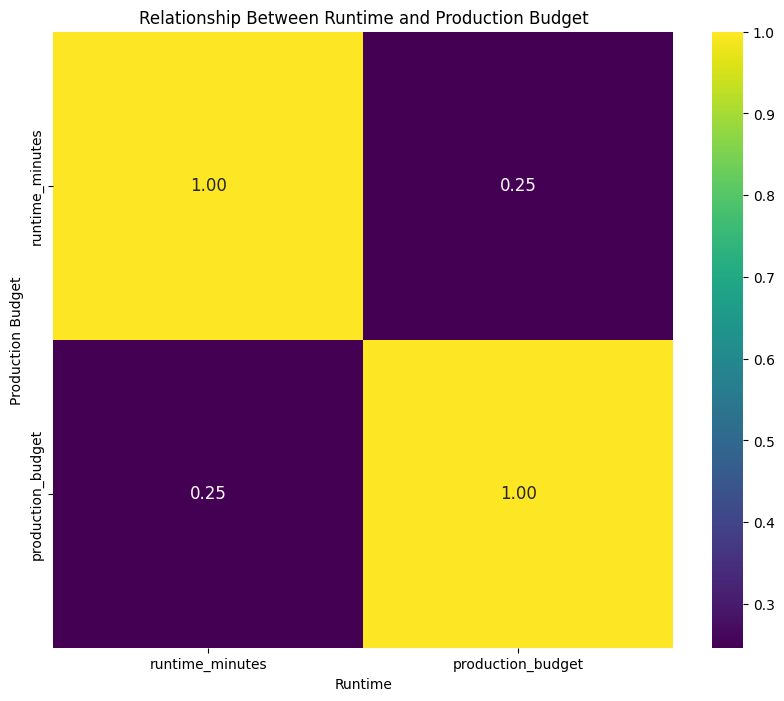

In [185]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df6[['runtime_minutes', 'production_budget']].corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Relationship Between Runtime and Production Budget')
plt.xlabel('Runtime')
plt.ylabel('Production Budget')
plt.show()

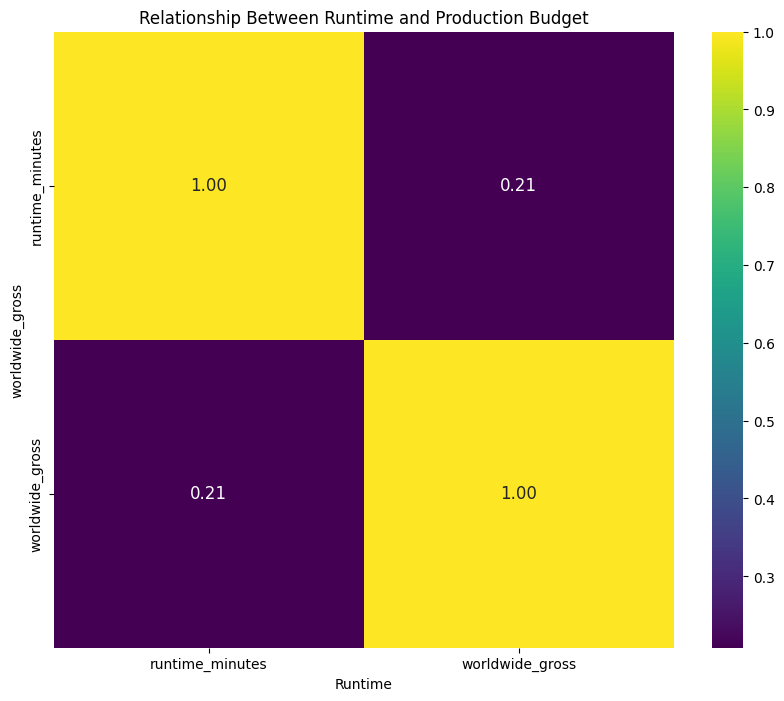

In [184]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df6[['runtime_minutes', 'worldwide_gross']].corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Relationship Between Runtime and Production Budget')
plt.xlabel('Runtime')
plt.ylabel('worldwide_gross')
plt.show()

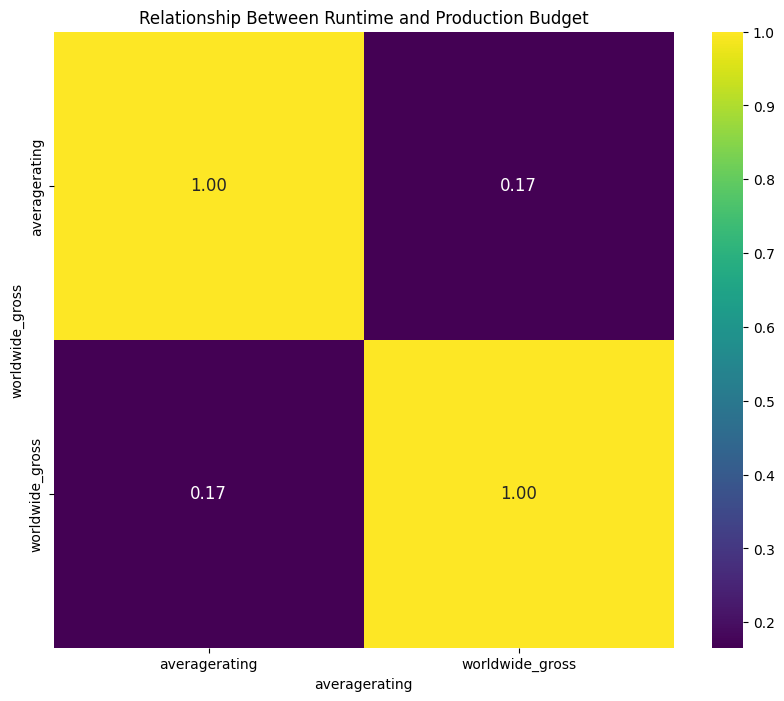

In [183]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df6[['averagerating', 'worldwide_gross']].corr(), annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Relationship Between Runtime and Production Budget')
plt.xlabel('averagerating')
plt.ylabel('worldwide_gross')
plt.show()

RECCOMENDATIONS